[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28.]
[0, 0, 0, 0, 0, 0, 992.0, 1130.0, 1260.0, 1382.0, 1496.0, 1602.0, 1700.0, 1790.0, 1872.0, 1946.0, 2012.0, 2070.0, 2120.0, 2162.0, 2196.0, 2222.0, 2240.0, 2250.0, 2252.0, 2246.0, 2232.0, 2210.0, 2180.0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1382.0, 1496.0, 1602.0, 1700.0, 1790.0, 1872.0, 1946.0, 2012.0, 2070.0, 2120.0, 2162.0, 2196.0, 2222.0, 2240.0, 2250.0, 2252.0, 2246.0, 2232.0, 2210.0, 2180.0]
[0, 182.0, 344.0, 482.0, 596.0, 686.0, 752.0, 794.0, 812.0, 806.0, 776.0, 722.0, 644.0, 542.0, 416.0, 266.0, 92.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


Text(0, 0.5, 'profits')

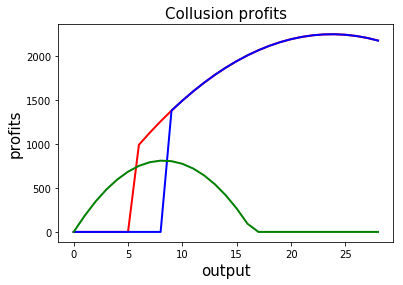

In [23]:
#1
from scipy import optimize,arange
from numpy import array
import matplotlib.pyplot as plt
%matplotlib inline
from ipywidgets import interactive, interact, interact_manual
from pylab import *

#2
def demand(x1,x2,b):
    return 100-x1-b*x2

def cost(x,c,F):
    if x == 0:
     cost = 0
    else:
     cost = c*x+F
    return cost
def profit(x1,x2,b,c,F):
    return demand(x1,x2,b)*x1 - cost(x1,c,F)

#3
def BRi(xj,ci,b,F):
    x1 = optimize.brute(lambda x: -profit(x,xj,ci,b,F), ((0,1,),)) 
    return x1[0]

#4
def vector_BRi(x,b,c,F):
    return array(x)-array([BRi(x[1],c[0],b,F[0]),BRi(x[0],c[1],b,F[1])])

#5
def collusion_profits(x,b,c,F,delta): # we only do this for the symmetric case: c1 = c2 = c
    profits = profit(x,x,b,c,F)
    nash_eq = optimize.fsolve(vector_BRi, x0, args = (b,ci,Fi))
    if profits >= (1-delta)*profit(BRi(x,c,b,F),x,c,b,F)+delta*profit(nash_eq[0],nash_eq[1],c,b,F):
        industry_profits = 2*profits # profits can be sustained as collusion profits
    else:
        industry_profits = 0 # profits cannot be sustained as collusion profits
    return industry_profits

#6

#PARAMETERS
x0 = [40, 40]
b = 1
ci = [5, 5]
Fi = [2, 2]
#PARAMETERS END

#STEP-SIZE I GRAFEN:
s_s = 1 
# JO LAVERE, JO LANGSOMMERE ER KODEN, MEN JO MERE SMOOTH ER GRAFEN

range_x = arange(0,nash_eq[0]*2,s_s) #NASH-EQ er en dårlig max, fordi man ikke ser collution-profittens maximum. Her har jeg bare ganget med to, før at gøre den større
delta1 = 0.8
delta2 = 0.2
range_profits = [collusion_profits(x,b,ci[0],Fi[0],delta1) for x in range_x]
range_profits2 = [collusion_profits(x,b,ci[0],Fi[0],delta2) for x in range_x]
non_collute = [2*profit(x,x,ci[0],b,Fi[0]) if profit(x,x,ci[0],b,Fi[0])>0 else 0 for x in range_x]

print(range_x)         #Bare checks. Skal slettes.
print(range_profits)   #Bare checks. Skal slettes.
print(range_profits2)  #Bare checks. Skal slettes.
print(non_collute)     #Bare checks. Skal slettes.

plt.clf()

plt.plot(range_x, range_profits,'-', color = 'r', linewidth = 2)
plt.plot(range_x, range_profits2,'-', color = 'b', linewidth = 2)
plt.plot(range_x, non_collute,'-', color = 'g', linewidth = 2)
plt.title("Collusion profits",fontsize = 15)
plt.xlabel("output",fontsize = 15)
plt.ylabel("profits",fontsize = 15,rotation = 90)